In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.helper import plot
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass, GLMultiClassModified
import math
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_classification, load_digits
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble.forest import RandomForestClassifier
from scipy.stats import multivariate_normal
import itertools

sns.set()

/Users/imam.ar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/Users/imam.ar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


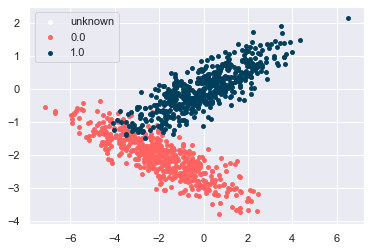

In [32]:
cov1 = np.array([[3,1],[1,0.2]])
red = np.random.multivariate_normal(mean=[0,0], cov=cov1, size=500)
cov2 = np.array([[3,-1],[-1,0.2]])
blue = np.random.multivariate_normal(mean=[-2,-2], cov=cov2, size=500)
Y = list(np.ones(len(red))) + list(np.ones(len(blue))*0)
X = list(red) + list(blue)

X0 = list(red[:60]) + list(blue[:60])
Y0 = list(np.ones(len(red)))[:60] + list(np.ones(len(blue))*0)[:60]
X1 = list(red[60:]) + list(blue[60:])

plot(X, Y, [])

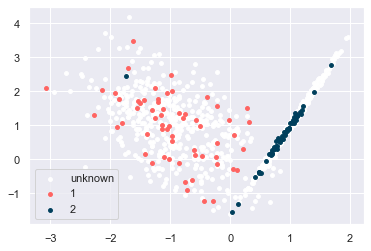

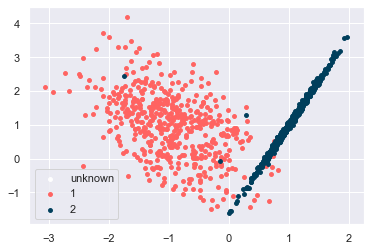

In [38]:
# N = 220
X, Y = make_classification(n_classes=2, n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, class_sep=1, random_state=2000, n_samples=1000)
X0 = list(X[:120])
Y0 = list(Y[:120])
X1 = list(X[120:])
# n_classes = max(Y)+1
# X0 = []
# Y0 = []
# for c in set(Y):
#     if c < n_classes/2:
#         X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:40]
#         Y0 += [y for y in Y if y==c][:40]
#     else:
#         X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:20]
#         Y0 += [y for y in Y if y==c][:20]
# X1 = [x for x in X if (list(x) not in list(X0))]
plot(X0, np.array(Y0)+1, X1)
plot(X, Y + 1, [])

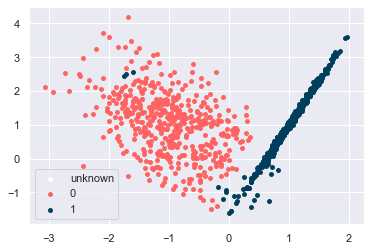

In [41]:
GL = GLMultiClassModified(X0, Y0, X1, cov=0.1)
GL.solve()
plot(X, np.array(GL.Y), [])

1.0
0.0


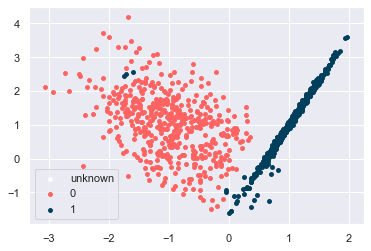

In [42]:
mbo = MBOMultiClass(X0, Y0, X1, cov=0.1)
mbo.solve()
plot(X, np.array(mbo.Y), [])

In [ ]:
a = 0.2
c = 0.01
for b in np.arange(0, np.sqrt(a*c),np.sqrt(a*c)/2):
    print("a:",a," b:",b," c:",c)
    cov = np.array([[a,b],[b,c]])
    to_plot = np.random.multivariate_normal(mean=[0,0], cov=cov, size=3000)
    ax = sns.kdeplot(to_plot, cmap="Reds", shade=True, bw=.15, cbar=True)
    ax
    cov = np.array([[a,b],[b,c]])
    mbo = MBOMultiClass(X0, Y0, X1, cov=cov)
    mbo.solve()
    print(classification_report(Y, mbo.Y))
    plot(X, np.array(mbo.Y)+1, [])

In [ ]:
a = 0.2
c = 0.01
for b in np.arange(0, np.sqrt(a*c),np.sqrt(a*c)/2):
    print("a:",a," b:",b," c:",c)
    cov = np.array([[a,b],[b,c]])
    to_plot = np.random.multivariate_normal(mean=[0,0], cov=cov, size=3000)
    ax = sns.kdeplot(to_plot, cmap="Reds", shade=True, bw=.15, cbar=True)
    ax
    GL = GLMultiClassModified(X0, Y0, X1, cov=cov)
    GL.solve()
    print(classification_report(Y, GL.Y))
    plot(X, np.array(GL.Y)+1, [])

In [ ]:
a = [0.2, 0.5]
b = 0
c = [0.2, 0.5]

flatten = lambda l: [item for sublist in l for item in sublist]
acs = flatten([list(zip(a,c)) for x in itertools.permutations(a,len(c))])
## b difference
for ac in acs:
    a, c = ac[0], ac[1]
    for b in np.arange(0, np.sqrt(a*c),np.sqrt(a*c)/2):
        print("a:",a," b:",b," c:",c)
        cov = np.array([[a,b],[b,c]])
        mbo = MBOMultiClass(X0, Y0, X1, cov=cov)
        mbo.solve()
        print(classification_report(Y, mbo.Y))
        plot(X, np.array(mbo.Y)+1, [])
        to_plot = np.random.multivariate_normal(mean=[0,0], cov=cov, size=3000)
        sns.kdeplot(to_plot, cmap="Reds", shade=True, bw=.15, cbar=True)

In [ ]:
a = [0.2, 0.5]
b = 0
c = [0.2, 0.5]

flatten = lambda l: [item for sublist in l for item in sublist]
acs = flatten([list(zip(a,c)) for x in itertools.permutations(a,len(c))])
## b difference
for ac in acs:
    a, c = ac[0], ac[1]
    for b in np.arange(0, np.sqrt(a*c),np.sqrt(a*c)/2):
        print("a:",a," b:",b," c:",c)
        cov = np.array([[a,b],[b,c]])
        to_plot = np.random.multivariate_normal(mean=[0,0], cov=cov, size=3000)
        sns.kdeplot(to_plot, cmap="Reds", shade=True, bw=.15, cbar=True)
        GL = GLMultiClassModified(X0, Y0, X1, cov=cov)
        GL.solve()
        print(classification_report(Y, GL.Y))
        plot(X, np.array(GL.Y)+1, [])

In [ ]:
GL = GLMultiClass(X0, Y0, X1, sigm=1)
GL.solve()
plot(X, GL.Y+1, [])

In [ ]:
GL = GLMultiClassModified(X0, Y0, X1, cov=1)
GL.solve()
plot(X, GL.Y+1, [])

In [ ]:
GL = GLMultiClassModified(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X, GL.Y+1, [])

In [ ]:
MBO = MBOMultiClass(X0, Y0, X1, sigm=1, dT=0.001)
MBO.solve()
plot(X,np.array(MBO.Y)+1,[])

## Experimenting

In [ ]:
len(X0[0])

In [ ]:
mean_vector

In [ ]:
mean_vector = np.array([1,2])
cov_vector = np.array([[1,0],[0,1]])
# np.random.multivariate_normal(mean_vector, cov_vector)
# weight_function = lambda x: multivariate_normal(x, mean=mean_vector, cov=cov_vector)
# weight_function([0,0])
wf = multivariate_normal(mean=mean_vector, cov=cov_vector)
wf.pdf([1,1]) / wf.pdf(mean_vector)

In [ ]:
sigm = 0.1
try:
    _ = iter(sigm)
except TypeError:
    print("cant iter")

In [ ]:
np.diag(2*np.ones(10))

In [ ]:
sd_vect

## MNIST

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.helper import plot
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass, GLMultiClassModified
import math
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_classification, load_digits
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble.forest import RandomForestClassifier
from scipy.stats import multivariate_normal
from datetime import datetime

sns.set()

In [2]:
N = 300

digits = load_digits()
X = [x.flatten()/digits.images.max() for x in digits.images]
Y = digits.target
n_classes = max(Y)+1

def generate_sd_vector(X, n_neigh=50):
    feature_index = list(range(len(X[0])))
    sd_vect = list()
    for feature_n in feature_index:
        xn = [x[feature_n] for x in X]
        xn.sort()
        nn_ = int(n_neigh / 2)
        max_n = len(xn) - 1
        xn = [max(abs(x-xn[(max(0,i-nn_))]), abs(x-xn[(min(max_n, i+nn_))])) for i, x in enumerate(xn)]
        sigm = np.mean(xn)
        sd_vect.append(sigm)
    return np.array(sd_vect)

sd_vect = generate_sd_vector(X)

X0 = list(X[:N])
Y0 = list(Y[:N])
X1 = list(X[N:])

In [ ]:
## Develop Feature Important
label = 0
feature_amd = list()
feature_index = list(range(len(X0[0])))
for feature_n in feature_index:
    xn = [x[feature_n] for x in X0]
    label_set = np.mean(np.array(xn)[[y==label for y in Y0]])
    avg_mean_distance = list()
    for l in set(Y0):
        if l == label:
            pass
        else:
            distance = np.abs(np.mean(label_set) - np.mean(np.array(xn)[[y==l for y in Y0]]))
            avg_mean_distance.append(distance)
    avg_mean_distance = np.mean(avg_mean_distance)
    feature_amd.append(avg_mean_distance)
    # print("avg mean distance for feature", feature_n, ":", avg_mean_distance)
normalized_amd = feature_amd / max(feature_amd)
normalized_amd = np.array([x if x > 0.01 else 0.01 for x in normalized_amd])
normalized_amd

In [3]:
#Unbalanced
Z = 1
print("Z : ",Z)
X0 = []
Y0 = []
for c in set(Y):
    if c<5:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
        Y0 += [y for y in Y if y==c][:Z]
    else:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
        Y0 += [y for y in Y if y==c][:Z*2]
X1 = [x for x in X if (list(x) not in list(X0))]
Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print(pd.Series(Y0).value_counts())

# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve()

y_true =  [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
y_pred = [GL.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

Z :  1
9    2
8    2
7    2
6    2
5    2
4    1
3    1
2    1
1    1
0    1
dtype: int64
Accuracy: 0.6936026936026936
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       177
           1       0.30      0.85      0.44       181
           2       1.00      0.05      0.10       176
           3       0.56      0.99      0.72       182
           4       1.00      0.96      0.98       180
           5       0.98      0.99      0.99       180
           6       0.86      1.00      0.93       179
           7       0.95      0.99      0.97       177
           8       0.80      0.05      0.09       172
           9       0.60      0.02      0.03       178

    accuracy                           0.69      1782
   macro avg       0.81      0.69      0.62      1782
weighted avg       0.80      0.69      0.63      1782

Confussion Matrix
[[176   0   0   0   0   0   0   1   0   0]
 [  0 153   0   0   0   0  27   0   1   0]
 [  0 165   9   1 

In [5]:
#Unbalanced
Z = 1
print("Z : ",Z)
X0 = []
Y0 = []
for c in set(Y):
    if c<5:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
        Y0 += [y for y in Y if y==c][:Z]
    else:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
        Y0 += [y for y in Y if y==c][:Z*2]
X1 = [x for x in X if (list(x) not in list(X0))]
Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print(pd.Series(Y0).value_counts())

# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve(feature_important=True)

y_true =  [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
y_pred = [GL.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

Z :  1
9    2
8    2
7    2
6    2
5    2
4    1
3    1
2    1
1    1
0    1
dtype: int64
Accuracy: 0.6240179573512907
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       177
           1       0.32      0.99      0.48       181
           2       1.00      0.01      0.02       176
           3       0.40      0.92      0.56       182
           4       0.98      0.96      0.97       180
           5       0.79      0.37      0.51       180
           6       0.99      1.00      1.00       179
           7       0.99      0.89      0.94       177
           8       0.78      0.04      0.08       172
           9       0.50      0.01      0.02       178

    accuracy                           0.62      1782
   macro avg       0.77      0.62      0.56      1782
weighted avg       0.77      0.62      0.56      1782

Confussion Matrix
[[176   0   0   0   0   0   0   1   0   0]
 [  0 180   0   0   0   0   0   0   1   0]
 [  0 172   2   1 

In [ ]:
Z = 1
print("Z : ",Z)
X0 = []
Y0 = []
for c in set(Y):
    if c<5:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
        Y0 += [y for y in Y if y==c][:Z]
    else:
        X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
        Y0 += [y for y in Y if y==c][:Z*2]
X1 = [x for x in X if (list(x) not in list(X0))]
Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print(pd.Series(Y0).value_counts())

tic = datetime.now()
Dim = np.array(X).shape[1]
MBO = MBOMultiClass(X0, Y0, X1, cov=0.3, dT=0.05)
MBO.solve()

y_true =  [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
y_pred = [MBO.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))
print("TOTAL RUNNING TIME : ", datetime.now() - tic)

In [ ]:
# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve()

y_true = Y[N:]
y_pred = GL.Y[N:]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
# reload(GraphLaplacian)
Dim = np.array(X).shape[1]
GL = GLMultiClassModified(X0, Y0, X1, cov=0.3)
GL.solve()

y_true = Y[N:]
y_pred = GL.Y[N:]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
Dim = np.array(X).shape[1]
GL = GLMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)))
GL.solve()

In [ ]:
y_true = Y[N:]
y_pred = GL.Y[N:]
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
Dim = np.array(X).shape[1]
MBO = MBOMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)), dT=0.001)
MBO.solve()

In [ ]:
Y1_mbo = [MBO.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
accuracy_score(Y1, Y1_mbo)

In [ ]:
y_true = Y[N:]
y_pred = np.array(MBO.Y[N:])
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
cls = LinearSVC()
cls.fit(X0, Y0)
Y1 = cls.predict(X1)

In [ ]:
y_true = Y[N:]
y_pred = np.array(Y1)
print("Accuracy:",accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
labels = pd.Series(y_true).unique()
labels.sort()
print("Confussion Matrix")
print(confusion_matrix(y_true, y_pred, labels=labels))

In [ ]:
Ns = [20,30,40,50,70,90,100,150,200,300]#[10,20]#30,40,50,70,90,100,150,200,300]
# R = list()
RR = list()
for N in Ns:
    print("N", N)
    digits = load_digits()
    X = [x.flatten()/digits.images.max() for x in digits.images]
    Y = digits.target
    n_classes = max(Y)+1
    X0 = list(X[:N])
    Y0 = list(Y[:N])
    X1 = list(X[N:])
    
    Dim = np.array(X).shape[1]
    GL = GLMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)))
    GL.solve()
    
    Dim = np.array(X).shape[1]
    MBO = MBOMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)), dT=0.01)
    MBO.solve()
    
    cls = LinearSVC()
    cls.fit(X0, Y0)
    Y1 = cls.predict(X1)

    
#    R.append({"GL":accuracy_score(Y[N:], GL.Y[N:]), "MBO":accuracy_score(Y[N:], MBO.Y[N:]), "SVM":accuracy_score(Y[N:], Y1)})

    cls = RandomForestClassifier()
    cls.fit(X0, Y0)
    Y1 = cls.predict(X1)
    RR.append(accuracy_score(Y[N:], Y1))

In [ ]:
n_classes = max(Y)+1
Zs = [1,2,3,4,5,7,10,20]
R = list()
for Z in Zs:
    print("Z : ",Z)
    X0 = []
    Y0 = []
    for c in set(Y):
        if c<5:
            X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z]
            Y0 += [y for y in Y if y==c][:Z]
        else:
            X0 += [list(X[i]) for i,y in enumerate(Y) if y==c][:Z*2]
            Y0 += [y for y in Y if y==c][:Z*2]
    X1 = [x for x in X if (list(x) not in list(X0))]
    Y1 = [Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
    print(pd.Series(Y0).value_counts())

    Dim = np.array(X).shape[1]
    GL = GLMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)))
    GL.solve()
    Y1_gl = [GL.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
    
    Dim = np.array(X).shape[1]
    MBO = MBOMultiClass(X0, Y0, X1, sigm=0.1*(np.sqrt(Dim)), dT=0.05)
    MBO.solve()
    Y1_mbo = [MBO.Y[i] for i,x in enumerate(X) if (list(x) not in list(X0))]
    
    cls = LinearSVC()
    cls.fit(X0, Y0)
    Y1_svm = cls.predict(X1)
    
    cls = RandomForestClassifier()
    cls.fit(X0, Y0)
    Y1_rf = cls.predict(X1)
    
    R.append({"N":len(X0), "GL":accuracy_score(Y1, Y1_gl), "MBO":accuracy_score(Y1, Y1_mbo)
              , "SVM":accuracy_score(Y1, Y1_svm), "RandomForest":accuracy_score(Y1, Y1_rf)})
    print({"N":len(X0), "GL":accuracy_score(Y1, Y1_gl), "MBO":accuracy_score(Y1, Y1_mbo)
              , "SVM":accuracy_score(Y1, Y1_svm), "RandomForest":accuracy_score(Y1, Y1_rf)})

In [ ]:
df = pd.DataFrame(R)

In [ ]:
df.to_csv("GL_MBO_SVM_RandomForest_MNIST_unbalanced_2N.csv")

In [ ]:
df_plot = df.melt(id_vars="N", value_name="Accuracy", value_vars=["GL", "MBO", "SVM","RandomForest"])
sns.lineplot(data=df_plot, x="N", y="Accuracy", hue="variable")

In [ ]:
pd.Series(Y0).value_counts()

In [ ]:
cat = ["A", "A", "A", "B", "B"]
num = [1,2,3,1,2]
val = [100, 200, 200, 100, 120]
df = pd.DataFrame()
df.loc[:, "date"] = num
df.loc[:, "cat"] = cat
df.loc[:, "val"] = val
df

In [ ]:
df_dt = df[["date"]].drop_duplicates()
df_dt["dum"] = 1
df_cat = df[["cat"]].drop_duplicates()
df_cat["dum"] = 1
df_all = pd.merge(df_dt, df_cat, on="dum", how="outer")[["date", "cat"]]
df_final = pd.merge(df, df_all, on=["date", "cat"], how="outer")

In [ ]:
df_final = pd.merge(df, df_all, on=["date", "cat"], how="outer")
df_final

In [ ]:
feature_col = ["val"]
for c in feature_col:
    df_final["temp"] = df_final.groupby("cat")[c].transform(lambda x: x.rolling(10, 1).mean())
    df_final.loc[:, c] = df_final.apply(lambda s: s[c] if str(s[c])!="nan" else s["temp"], axis=1)
df_final.drop(["temp"], axis=1, inplace=True)
    
df_final

In [ ]:
data = [10,11,10,9,33,10,12,9,9,9,20,13]
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
out = [x for x in data if x > upper_limit or x < lower_limit]
out

In [ ]:
q1